<a href="https://colab.research.google.com/github/Jakub-Drabikowski/Machine-learning-kontrola-jakosci/blob/main/Kontrola_jakosci_komponentow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahrabahra","key":"facdfb0521b66763f3c042f103616189"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product

 95% 95.0M/100M [00:03<00:00, 27.7MB/s]
100% 100M/100M [00:03<00:00, 27.3MB/s] 


In [ ]:
from zipfile import ZipFile
file_name = 'real-life-industrial-dataset-of-casting-product.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
train_gen = ImageDataGenerator(rescale=1/255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2)

train_data = train_gen.flow_from_directory('/content/casting_data/casting_data/train',
                                          class_mode='binary',
                                          batch_size=8,
                                          target_size=(64,64),
                                          color_mode='grayscale')
test_gen = ImageDataGenerator(rescale=1/255)

test_data = test_gen.flow_from_directory('/content/casting_data/casting_data/test',
                                        class_mode='binary',
                                        batch_size=8,
                                        target_size=(64,64),
                                        color_mode='grayscale')

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(train_data,validation_data=test_data,epochs=10)

Epoch 1/10
830/830 [==============================] - 33s 37ms/step - loss: 0.5849 - accuracy: 0.6807 - val_loss: 0.9327 - val_accuracy: 0.4867
Epoch 2/10
830/830 [==============================] - 27s 33ms/step - loss: 0.3853 - accuracy: 0.8180 - val_loss: 0.9720 - val_accuracy: 0.5734
Epoch 3/10
830/830 [==============================] - 30s 36ms/step - loss: 0.2950 - accuracy: 0.8697 - val_loss: 0.4284 - val_accuracy: 0.7944
Epoch 4/10
830/830 [==============================] - 29s 35ms/step - loss: 0.2182 - accuracy: 0.9065 - val_loss: 0.4517 - val_accuracy: 0.8098
Epoch 5/10
830/830 [==============================] - 30s 36ms/step - loss: 0.1686 - accuracy: 0.9311 - val_loss: 0.2363 - val_accuracy: 0.8993
Epoch 6/10
830/830 [==============================] - 29s 35ms/step - loss: 0.1420 - accuracy: 0.9426 - val_loss: 0.2788 - val_accuracy: 0.9035
Epoch 7/10
830/830 [==============================] - 28s 34ms/step - loss: 0.1254 - accuracy: 0.9548 - val_loss: 0.2122 - val_accuracy:

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

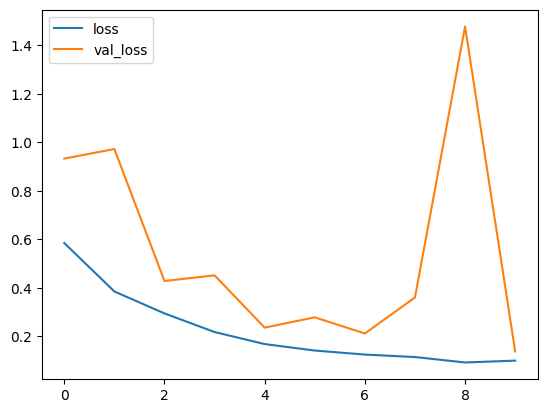

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
pred_probability = model.predict_generator(test_data)

In [ ]:
pred_probability = model.predict_generator(test_data)

In [ ]:
predictions = pred_probability > 0.5

In [ ]:
print(classification_report(test_data.classes,predictions))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       453
           1       0.37      0.40      0.38       262

    accuracy                           0.52       715
   macro avg       0.50      0.50      0.50       715
weighted avg       0.53      0.52      0.53       715

